In [5]:
%matplotlib inline
%cd /home/naodell/work/hgcal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import cm
from descartes import PolygonPatch

from scipy.spatial import Delaunay
import scripts.helpers as hlp

/home/naodell/work/hgcal


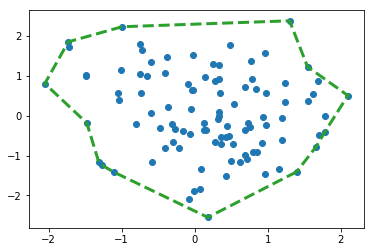

In [6]:
a = np.random.randn(100, 2)
ashape = hlp.alpha_shape(a, 0.5)
fig, ax = plt.subplots(1,1)
patch = PolygonPatch(ashape[0], fill=False, ec='C2', linestyle='--', linewidth=3)
ax.add_patch(patch)
b = a.transpose()
ax.scatter(b[0], b[1])
plt.show()

In [ ]:
from root_pandas import read_root
features = [
            'id', 'zside', 'subdet','layer', 'module', 
            'x', 'y', 'z', 
            'tc_layer', 'tc_zside', 'tc_subdet', 'tc_id', 'tc_wafer',
            'tc_x', 'tc_y', 'tc_z'
           ]

df_new = read_root('data/test_triggergeom_newmap.root', 'hgcaltriggergeomtester/TreeModules',  columns=features, flatten=features[8:])
df_new = df_new.drop('__array_index', axis=1)
panel_offset = 0
panel_mask = 0x1F
sector_offset = 5
sector_mask = 0x7

df_new['panel']  = [(val >> 8) & panel_mask for val in df_new['id'].values]
df_new['sector'] = [(val >> 8 + sector_offset) & sector_mask for val in df_new['id'].values]
df_new.head(20)

loop over motherboards ('id' field) and plot color-coded trigger cell locations

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.title('panels');

df_sector = df_new.query('zside == 1 and layer == 15 and subdet == 3 and sector == 1')
df_sector.plot('tc_x', 'tc_y', c='panel', kind='scatter', cmap='tab20', marker='h', s=20, ax=ax)
centers = df_sector.groupby('panel').mean()[['tc_x', 'tc_y']]

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_xlim(-200,0)
ax.set_ylim(-100,100)

plt.grid()
plt.show()

In [ ]:
df_panel = df_sector.query('panel == 1')
points = df_panel[['tc_x', 'tc_y']].values

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_panel.plot('tc_x', 'tc_y', c='C0', kind='scatter', marker='h', s=200, ax=ax)

alpha_shape, edge_points = hlp.alpha_shape(points, alpha=0.5)
patch = PolygonPatch(alpha_shape, fill=False, ec='C2', linestyle='--', linewidth=3)
ax.add_patch(patch)
    
ax.set_title('panels');
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
#ax.set_xlim(-125, -50)
#ax.set_ylim(25, 75)

plt.grid()
plt.show()

In [ ]:
from matplotlib import cm
import pickle 

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = cm.get_cmap('tab20')
patch_dict = {}
for i, n_panel in enumerate(df_sector.n.unique()):
    df_panel = df_sector.query(f'n == {n_panel}')
    points = df_panel[['tc_x', 'tc_y']].values
    ashape, edge_points = hlp.alpha_shape(points, alpha=0.5)
    if n_panel == 7:
        col = 'C1'
    else:
        col = 'C3'
    patch = PolygonPatch(ashape, fill=False, ec=col, linestyle='-', linewidth=3)
    ax.add_patch(patch)
    patch_dict[n_panel] = ashape
    
outfile = open('data/panel_patches.pkl', 'wb')
pickle.dump(patch_dict, outfile)
    
ax.set_title('panels');
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_xlim(-200, -0)
ax.set_ylim(-100, 100)

plt.grid()
plt.show()